In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from model_2 import Config
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [4]:
def show(data, marker, path):
    plt.subplot(2, 1, 1)
    plt.plot([i for i in range(len(data))], data)

    plt.subplot(2, 1, 2)
    plt.plot([i for i in range(len(marker))], marker)

    plt.show()


def deal_data(data, marker):
    # 舍弃99标签以前的数据(包括99标签) 、 91号以后的标签(包括91号)
    index_99 = np.max(np.where(marker == 99)[0])
    index_91 = np.min(np.where(marker == 91)[0])
    marker = marker[index_99 + 1: index_91]
    data = data[index_99 + 1: index_91]
    # 舍弃91号数据
    # index_91 = np.where(marker == 91)[0]
    # data = np.delete(data, index_91, axis=0)
    # marker = np.delete(marker, index_91, axis=0)
    return data, marker

In [5]:
class Data:
    def __init__(self, cfg):
        self.cfg = cfg
        self.simple_path = "data_f5/5F-SubjectB-160311-5St-SGLHand-HFREQ.mat"
        self.source_data = None  # [-1, 22]
        self.source_marker = None  # [-1, 1]
        self.mean = None
        self.std = None
        self.create_data()
        self.simple()

    def create_data(self):
        data, marker = self.load_mat_data()
        data, self.source_marker = deal_data(data, marker)  # marker: [-1, 1]
        # 归一化
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.source_data = (data - self.mean) / self.std  # [-1, 22]

    def simple(self):
        """
        simple : [-1, 8, 128, 22]
        """
        cfg = self.cfg
        size = cfg.frame * cfg.input_size  # 8 * 128
        markers = np.reshape(self.source_marker, [-1])
        start_index = 0
        current_marker = None
        simple = None
        label = []
        for index, marker in enumerate(markers):  # marker: 0 or 1 or 2 or 3 or 4 or 5
            if current_marker is None:
                current_marker = marker
                continue
            if current_marker == marker:
                continue
            data = self.source_data[start_index: index]  # [-1, 22]
            num = len(data) // size
            if num == 0:
                continue
            data = data[: num * size]
            data = np.reshape(data, [-1, cfg.frame, cfg.input_size, cfg.channel])
            if simple is None:
                simple = data
            else:
                simple = np.concatenate((simple, data), axis=0)
            for i in range(len(data)):
                label.append(current_marker)
            # 更新参数
            start_index = index
            current_marker = marker
        return simple, label

    def load_mat_data(self):
        """
        加载数据
        :return:
        data: [-1, 22]
        marker:
        0 : 无操作;
        1 - 5 ：对应手指操作;
        91 ：between;
        92 ：end;
        99 ：start
        """
        file = sio.loadmat(self.simple_path)
        data = file["o"]["data"][0][0]  # [-1, 22]
        data = np.array(data).astype(np.float)

        marker = file["o"]["marker"][0][0]  # [-1, 1]
        marker = np.array(marker).astype(np.int)
        return data, marker

    def to_value(self, data):
        if self.mean is None:
            self.get_param()
        return data * self.std + self.mean

    def get_param(self):
        data, source_marker = self.load_mat_data()
        # 归一化
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)

In [7]:
cfg = Config()
ds = Data(cfg)

In [12]:
data, marker = ds.simple()
marker = np.array(marker)

In [46]:
def show_for_marker(m):
    size = 8 * 128
    index = np.where(marker == m)[0][2]
    marker_0 = data[index]  # [8, 128, 22]
    marker_0 = np.reshape(marker_0, [size, 22])
    plt.title("marker: {m}".format(m=m))
    plt.subplot(1, 1, 1)
    plt.plot([j for j in range(size)], marker_0)
    plt.show()

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


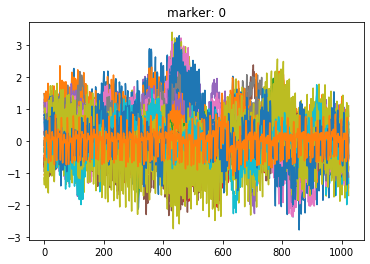

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


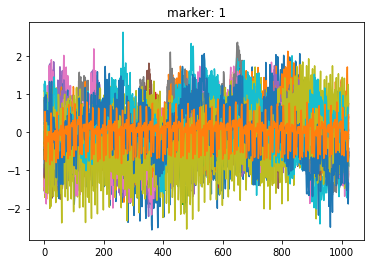

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


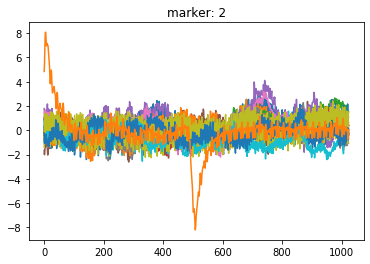

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


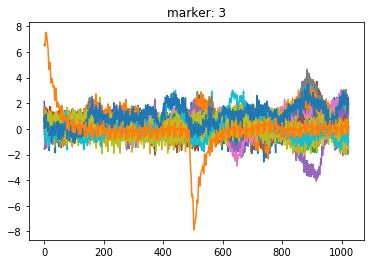

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


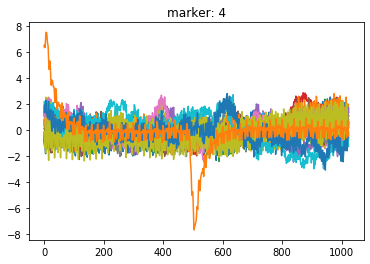

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


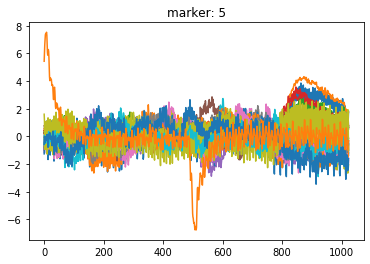

In [47]:
show_for_marker(0)
show_for_marker(1)
show_for_marker(2)
show_for_marker(3)
show_for_marker(4)
show_for_marker(5)

In [43]:
def show_for_marker_all(m):
    index = np.where(marker == m)[0]
    marker_0 = data[index][: 8]  # [8, 128, 22]
    marker_0 = np.reshape(marker_0, [-1, 22])
    plt.title("marker: {m}".format(m=m))
    plt.subplot(1, 1, 1)
    plt.plot([j for j in range(len(marker_0))], marker_0)
    plt.show()

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


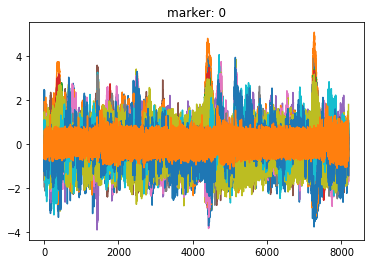

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


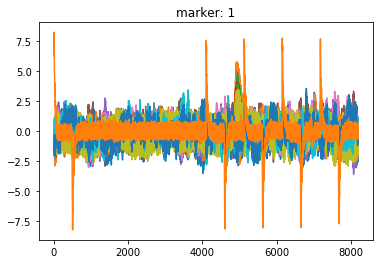

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


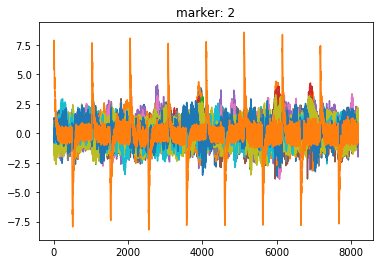

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


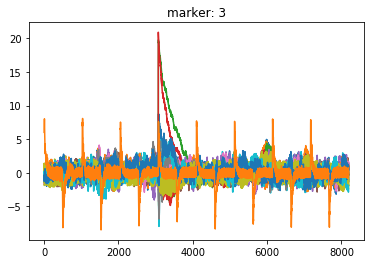

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


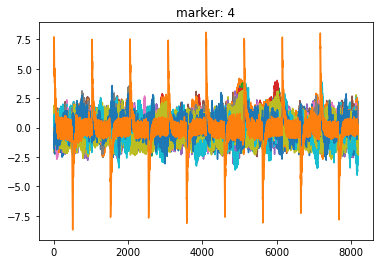

/Users/gangqing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


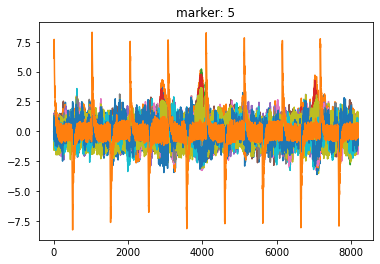

In [48]:
show_for_marker_all(0)
show_for_marker_all(1)
show_for_marker_all(2)
show_for_marker_all(3)
show_for_marker_all(4)
show_for_marker_all(5)

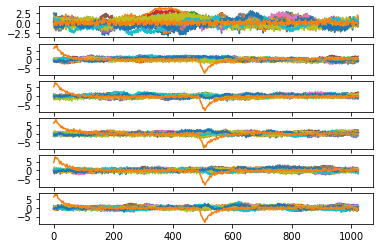

In [50]:
size = 8 * 128
for m in range(6):
    index = np.where(marker == m)[0][0]
    marker_0 = data[index]  # [8, 128, 22]
    marker_0 = np.reshape(marker_0, [size, 22])e
    plt.subplot(6, 1, m + 1)
    plt.plot([j for j in range(size)], marker_0)
plt.show()